In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [49]:
df = pd.read_csv("employee_churn_data_clean.csv")
df

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,0,5.0,0.626759,0,180.866070,0
1,operations,0,0.751900,3,1,6.0,0.443679,0,182.708149,0
2,support,0,0.722548,3,1,6.0,0.446823,0,184.416084,0
3,logistics,0,0.675158,4,2,8.0,0.440139,0,188.707545,0
4,sales,0,0.676203,3,2,5.0,0.577607,1,179.821083,0
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,1,8.0,0.543641,0,188.155738,1
9536,logistics,0,0.746887,3,1,8.0,0.549048,0,188.176164,1
9537,operations,0,0.557980,3,0,7.0,0.705425,0,186.531008,1
9538,IT,0,0.584446,4,1,8.0,0.607287,1,187.641370,1


In [50]:
train_data,test_data = train_test_split(df,test_size=0.3,random_state=0)
train_data = pd.concat([train_data])

<Axes: >

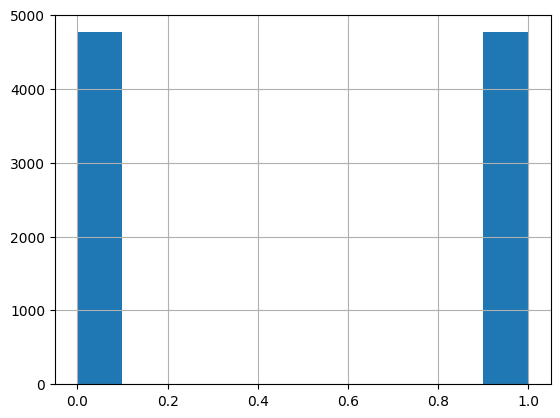

In [51]:

most_dep = train_data["left"].value_counts().max()
lst = [train_data]
for class_index, group in train_data.groupby('left'):
    lst.append(group.sample(most_dep-len(group), replace=True))
train_data = pd.concat(lst)
train_data["left"].hist()

<Axes: >

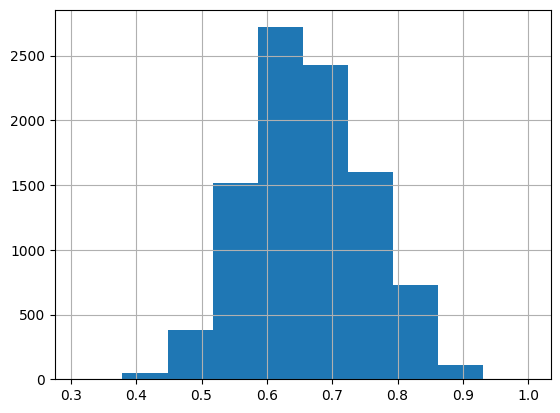

In [52]:
train_data["review"].hist()

<Axes: >

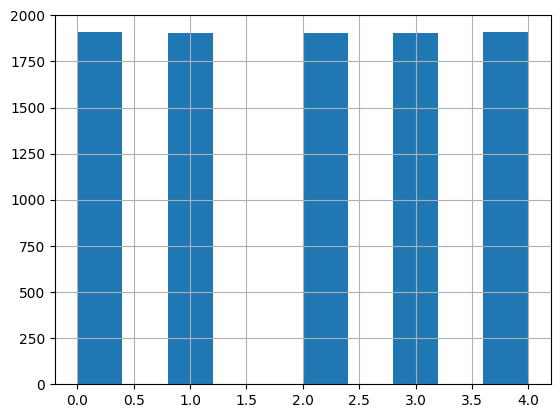

In [53]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=5, encode="ordinal")
train_data["review"] = discretizer.fit_transform(train_data["review"].to_numpy().reshape(-1, 1))
train_data["review"].hist()


<Axes: >

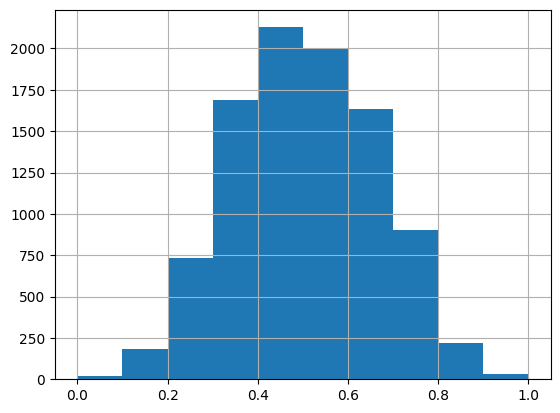

In [54]:
df['satisfaction'].hist()

<Axes: >

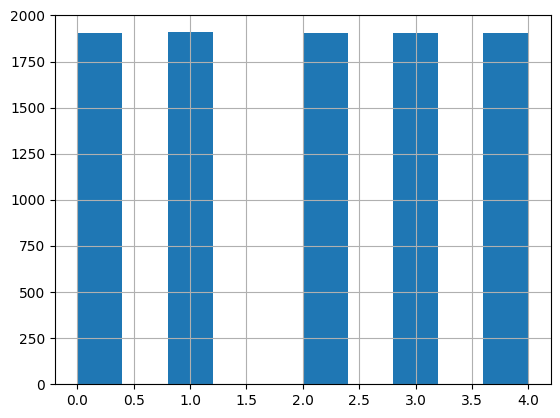

In [55]:
discretizer = KBinsDiscretizer(n_bins=5, encode="ordinal")
train_data["satisfaction"] = discretizer.fit_transform(train_data["satisfaction"].to_numpy().reshape(-1, 1))
train_data["satisfaction"].hist()

<Axes: >

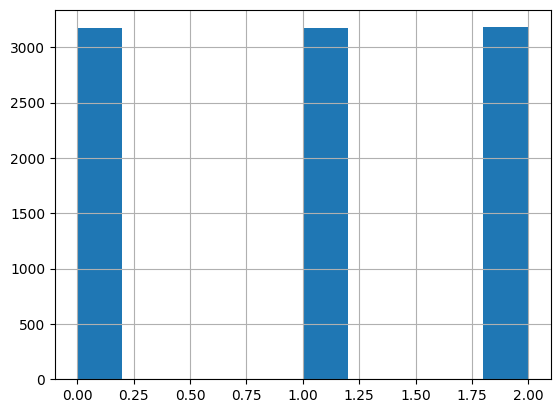

In [56]:
discretizer = KBinsDiscretizer(n_bins=3, encode="ordinal")
train_data["avg_hrs_month"] = discretizer.fit_transform(train_data["avg_hrs_month"].to_numpy().reshape(-1, 1))
train_data["avg_hrs_month"].hist()

In [57]:
from sklearn.feature_extraction.text import HashingVectorizer

hasher = HashingVectorizer(n_features=10, binary=True)
encoded = hasher.fit_transform(train_data["department"])
encoded = pd.DataFrame(encoded.A, columns=[f"department_{i}" for i in range(hasher.n_features)])
encoded

train_data = pd.concat([encoded.set_index(train_data.index),train_data], axis=1)
train_data = train_data.drop(["department"],axis=1)
train_data

,department_0,department_1,department_2,department_3,department_4,department_5,department_6,department_7,department_8,department_9,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
1517,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,3,0,5.0,4.0,0,0.0,0
7511,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,4,1,7.0,2.0,0,1.0,0
3558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,4.0,4,1,5.0,0.0,0,0.0,1
6342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,4.0,3,1,9.0,2.0,0,2.0,0
4456,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,3,1,5.0,2.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,4,1,6.0,1.0,0,1.0,1
3435,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,3,1,6.0,1.0,1,0.0,1
8633,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3,0,7.0,4.0,0,1.0,1
4557,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,4,2,4.0,1.0,0,0.0,1


In [58]:

hasher = HashingVectorizer(n_features=10, binary=True)
encoded = hasher.fit_transform(test_data["department"])
encoded = pd.DataFrame(encoded.A, columns=[f"department_{i}" for i in range(hasher.n_features)])

test_data = pd.concat([encoded.set_index(test_data.index),test_data], axis=1)
test_data = test_data.drop(["department"],axis=1)
test_data

,department_0,department_1,department_2,department_3,department_4,department_5,department_6,department_7,department_8,department_9,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
4201,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.824216,3,1,5.0,0.371939,1,179.452033,1
1166,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.610875,3,2,5.0,0.529254,0,178.823881,0
7664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.532324,4,1,8.0,0.454286,0,188.124078,0
6589,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.708532,3,1,10.0,0.549473,0,195.349963,0
8886,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.800551,3,1,8.0,0.648343,0,188.612317,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.687485,4,1,5.0,0.752645,0,180.121531,1
4092,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.836415,3,1,4.0,0.328842,0,177.723585,1
6386,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.411028,3,1,8.0,0.393935,0,190.368509,0
5614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.615693,4,2,5.0,0.336712,0,181.492881,0


In [59]:
train_data.to_csv("employee_training_data.csv", index= False)
test_data.to_csv("employee_test_data.csv",index= False)

In [60]:
train_data

,department_0,department_1,department_2,department_3,department_4,department_5,department_6,department_7,department_8,department_9,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
1517,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,3,0,5.0,4.0,0,0.0,0
7511,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,4,1,7.0,2.0,0,1.0,0
3558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,4.0,4,1,5.0,0.0,0,0.0,1
6342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,4.0,3,1,9.0,2.0,0,2.0,0
4456,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,3,1,5.0,2.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,4,1,6.0,1.0,0,1.0,1
3435,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,3,1,6.0,1.0,1,0.0,1
8633,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3,0,7.0,4.0,0,1.0,1
4557,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,4,2,4.0,1.0,0,0.0,1
